In [1]:
from matplotlib import pyplot as plt 
import os 
import pandas as pd 

In [2]:
# AN v6 
#d = "/eos/user/a/atishelm/www/HHWWgg/DNN/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/Categorization_UpdatedSmoothingNoNegatives/"
#d_soversqrtb = "/eos/user/a/atishelm/www/HHWWgg/DNN/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/Categorization_UpdatedSmoothingNoNegatives_SoversqrtB/"

# AN v7 
d = "/eos/user/a/atishelm/www/HHWWgg/DNN/HIG-21-014_AN_20_165_v7/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/categorization/"
d_soversqrtb = "/eos/user/a/atishelm/www/HHWWgg/DNN/HIG-21-014_AN_20_165_v7/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/categorization_SoversqrtB/"

In [11]:
files = ["%s/%s"%(d,f) for f in os.listdir(d) if "nBins_90" in f and "massMin122" in f and "v2.txt" in f]
files_sOversqrtB = ["%s/%s"%(d_soversqrtb,f) for f in os.listdir(d_soversqrtb) if "nBins_90" in f and "massMin122" in f and "v2.txt" in f]

In [12]:
print("files:",files)
print("=====")
print("files_sOversqrtB",files_sOversqrtB)

files: ['/eos/user/a/atishelm/www/HHWWgg/DNN/HIG-21-014_AN_20_165_v7/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/categorization//categorize_nBins_90_nCat_1_massMin122.0_massMax128.0_v2.txt', '/eos/user/a/atishelm/www/HHWWgg/DNN/HIG-21-014_AN_20_165_v7/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/categorization//categorize_nBins_90_nCat_2_massMin122.0_massMax128.0_v2.txt', '/eos/user/a/atishelm/www/HHWWgg/DNN/HIG-21-014_AN_20_165_v7/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/categorization//categorize_nBins_90_nCat_3_massMin122.0_massMax128.0_v2.txt', '/eos/user/a/atishelm/www/HHWWgg/DNN/HIG-21-014_AN_20_165_v7/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/categorization//categorize_nBins_90_nCat_4_massMin122.0_massMax128.0_v2.txt', '/eos/user/a/atishelm/www/HHWWgg/DNN/HIG-21-014_AN_20_165_v7/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/categorization//categorize_nBins_90_nCat_5_ma

In [7]:
##-- Make table for each Number of categories for a given binning, 

roundPlace = 5

for i, file in enumerate(files):
    ##-- Begin Table
    print("\\begin{table}[H]")
    print("  \\begin{center}")
    print("    \\begin{tabular}{c|c|c|c|c|c|c}")
    print("    CatN & DNN Min & DNN Max & S & $B_{SR}$ & $Data_{Sideband}$ & Significance\\\ \\hline")    
    
    ##-- Fill with category information
    df = pd.read_csv(file, header=None)
    Nrows = len(df.index)
    Ncats = Nrows - 1 
#     print("Nrows:",Nrows)
#     print("First Category:",df.iloc[-2,:])
    
    ##-- Get: 
    # Category Number, DNN score Min, DNN score max, Nsignal, NBkg, Significance 
    for irow in range(0, Ncats):
        thisRow = (irow * -1) - 2  
    #     print("thisRow:",thisRow)
        row = df.iloc[thisRow, 0]
        rowEntries = row.split()
        CatNum = irow
        DNNscoreMin = round(float(rowEntries[0]), roundPlace) 
        DNNscoreMax = round(float(rowEntries[1]), roundPlace)
        Nsignal = round(float(rowEntries[5]),roundPlace)
        NSB = round(float(rowEntries[-1]), roundPlace)
#         Ncont = round(float(rowEntries[7]), roundPlace)
#         NVH = round(float(rowEntries[9]), roundPlace)
#         NttH = round(float(rowEntries[11]), roundPlace)
        Nbkg = round(float(rowEntries[7]), roundPlace)
        Significance = round(float(rowEntries[3]), roundPlace)

        print("    %s & %s & %s & %s & %s & %s & %s \\\ "%(CatNum, DNNscoreMin, DNNscoreMax, Nsignal, Nbkg, NSB, Significance))
#         print("    %s & %s & %s & %s & %s & %s & %s & %s & %s \\\ "%(CatNum, DNNscoreMin, DNNscoreMax, Nsignal, Nbkg, Ncont, NVH, NttH, Significance))
        
    
    ##-- Finish table
    print("    \\end{tabular}")
    print("  \\end{center}")
    print("\\caption{")
    print("    Semi-Leptonic DNN Category Boundaries and yields in signal region for %s Categories"%(Ncats))
    print("}")
    print("\\label{tab:SLcategories_%s}"%(Ncats))
    print("\\end{table}")
    print(" ")
    


\begin{table}[H]
  \begin{center}
    \begin{tabular}{c|c|c|c|c|c|c}
    CatN & DNN Min & DNN Max & S & $B_{SR}$ & $Data_{Sideband}$ & Significance\\ \hline
    0 & 0.89 & 1.0 & 0.03568 & 0.81037 & 8.0 & 0.03935 \\ 
    \end{tabular}
  \end{center}
\caption{
    Semi-Leptonic DNN Category Boundaries and yields in signal region for 1 Categories
}
\label{tab:SLcategories_1}
\end{table}
 
\begin{table}[H]
  \begin{center}
    \begin{tabular}{c|c|c|c|c|c|c}
    CatN & DNN Min & DNN Max & S & $B_{SR}$ & $Data_{Sideband}$ & Significance\\ \hline
    0 & 0.89 & 1.0 & 0.03568 & 0.81037 & 8.0 & 0.03935 \\ 
    1 & 0.1 & 0.89 & 0.23129 & 511.65079 & 3580.0 & 0.01022 \\ 
    \end{tabular}
  \end{center}
\caption{
    Semi-Leptonic DNN Category Boundaries and yields in signal region for 2 Categories
}
\label{tab:SLcategories_2}
\end{table}
 
\begin{table}[H]
  \begin{center}
    \begin{tabular}{c|c|c|c|c|c|c}
    CatN & DNN Min & DNN Max & S & $B_{SR}$ & $Data_{Sideband}$ & Significance\\ \hline
 

In [13]:
##-- To plot both together

roundPlace = 6

fig, ax = plt.subplots()

NCats_vals = []
Tot_Sig_vals = []

for i, file in enumerate(files):
    df = pd.read_csv(file, header=None)
    NCats = len(df.index) - 1 
    NCats_vals.append(NCats)
    Tot_Sig = float(df.iloc[-1,-1].split(' ')[-1])
    Tot_Sig_vals.append(Tot_Sig)
    
print("NCats_vals:",NCats_vals)
print("Tot_Sig_vals:",Tot_Sig_vals)
    
plt.plot(NCats_vals, Tot_Sig_vals, 'o-', label = "General Expression")
    
NCats_vals_SoversqrtB = []
Tot_Sig_vals_SoversqrtB = []

for i, file in enumerate(files_sOversqrtB):
    df = pd.read_csv(file, header=None)
    NCats = len(df.index) - 1 
    NCats_vals_SoversqrtB.append(NCats)
    Tot_Sig = float(df.iloc[-1,-1].split(' ')[-1])
    Tot_Sig_vals_SoversqrtB.append(Tot_Sig)
    
print("NCats_vals_SoversqrtB:",NCats_vals_SoversqrtB)
print("Tot_Sig_vals_SoversqrtB:",Tot_Sig_vals_SoversqrtB)    
    
yMax_soversqrtb = max(Tot_Sig_vals_SoversqrtB)
yMax_general = max(Tot_Sig_vals)
overallYmax = -999 
if(yMax_soversqrtb > yMax_general):
    overallYmax = yMax_soversqrtb
else:
    overallYmax = yMax_general
    
print("\\begin{table}[H]")
print("  \\begin{center}")
print("    \\begin{tabular}{c|c|c}")
print("    NCategories & Total Significance with Eq \\ref{eq:SignifianceDef} & $\\frac{S}{\\sqrt{B}}$ \\\ \\hline")    
print("    1 & %s & %s  \\\ "%(round(Tot_Sig_vals[0],roundPlace), round(Tot_Sig_vals_SoversqrtB[0],roundPlace)))
print("    2 & %s & %s  \\\ "%(round(Tot_Sig_vals[1],roundPlace), round(Tot_Sig_vals_SoversqrtB[1],roundPlace)))
print("    3 & %s & %s  \\\ "%(round(Tot_Sig_vals[2],roundPlace), round(Tot_Sig_vals_SoversqrtB[2],roundPlace)))
print("    4 & %s & %s  \\\ "%(round(Tot_Sig_vals[3],roundPlace), round(Tot_Sig_vals_SoversqrtB[3],roundPlace)))
print("    5 & %s & %s  \\\ "%(round(Tot_Sig_vals[4],roundPlace), round(Tot_Sig_vals_SoversqrtB[4],roundPlace)))
print("    \\end{tabular}")
print("  \\end{center}")
print("\\caption{")
print("    Significance values using two equations for significance")
print("}")
print("\\label{tab:SigVsNcats_table}")
print("\\end{table}")
print(" ")    
    
    
plt.plot(NCats_vals_SoversqrtB, Tot_Sig_vals_SoversqrtB, 'o-', label = r"S / $\sqrt{B}$")
plt.legend(loc = 'best')
plt.xlabel("Number of Categories", fontsize = 15)
plt.ylabel("Significance", fontsize = 15)
plt.ylim(0, overallYmax*1.1)
plt.tight_layout()
# plt.show()
plt.savefig("%s/SigVsNCats.png"%(d))
plt.savefig("%s/SigVsNCats.pdf"%(d))
plt.close()
print("DONE")

NCats_vals: [1, 2, 3, 4, 5]
Tot_Sig_vals: [0.0393496112562, 0.040656234281, 0.0461345366644, 0.0470948358866, 0.0473601100102]
NCats_vals_SoversqrtB: [1, 2, 3, 4, 5]
Tot_Sig_vals_SoversqrtB: [0.0396352532773, 0.0409329516767, 0.0463896375113, 0.0473517701546, 0.0476158721579]
\begin{table}[H]
  \begin{center}
    \begin{tabular}{c|c|c}
    NCategories & Total Significance with Eq \ref{eq:SignifianceDef} & $\frac{S}{\sqrt{B}}$ \\ \hline
    1 & 0.03935 & 0.039635  \\ 
    2 & 0.040656 & 0.040933  \\ 
    3 & 0.046135 & 0.04639  \\ 
    4 & 0.047095 & 0.047352  \\ 
    5 & 0.04736 & 0.047616  \\ 
    \end{tabular}
  \end{center}
\caption{
    Significance values using two equations for significance
}
\label{tab:SigVsNcats_table}
\end{table}
 
DONE


NCats_vals: [1, 2, 3, 4, 5]
Tot_Sig_vals: [0.0393496112562, 0.040656234281, 0.0461345366644, 0.0470948358866, 0.0473601100102]


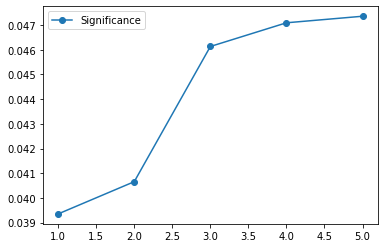

In [8]:
##-- To plot one

fig, ax = plt.subplots()

NCats_vals = []
Tot_Sig_vals = []

for i, file in enumerate(files):
    df = pd.read_csv(file, header=None)
    NCats = len(df.index) - 1 
    NCats_vals.append(NCats)
    Tot_Sig = float(df.iloc[-1,-1].split(' ')[-1])
    Tot_Sig_vals.append(Tot_Sig)
    
print("NCats_vals:",NCats_vals)
print("Tot_Sig_vals:",Tot_Sig_vals)
    
plt.plot(NCats_vals, Tot_Sig_vals, 'o-', label = "Significance")

plt.legend()
plt.show()
plt.close()

In [3]:
import ROOT
import numpy as np 

Welcome to JupyROOT 6.24/06


In [21]:
#f = ROOT.TFile.Open("/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/evalDNN_HH/evalDNN_HH_Histos_smoothing_SmoothSuper_bins70_massMin122.0_massMax128.0.root")
f = ROOT.TFile.Open("/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HHWWyyDNN_SL_MultiClass_WithMETFix_12LOHH_500epochs_BalanceYields/evalDNN_HH/evalDNN_HH_Histos_smoothing_SmoothSuper_bins90_massMin122.0_massMax128.0.root")
Bkg_SR_h = f.Get("h_evalDNN_HH_bkg_SR_weighted_smooth")
ttH_SR_h = f.Get("h_evalDNN_HH_ttHtoGG_SR_2017_smooth")
VH_SR_h = f.Get("h_evalDNN_HH_VHtoGG_SR_2017_smooth")
Sig_SR_h = f.Get("h_evalDNN_HH_signal_SR")

# Options:
# KEY: TH1F     h_evalDNN_HH_bkg_SR_weighted
# KEY: TH1F     h_evalDNN_HH_bkg_SR_weighted_smooth
# KEY: TH1F     h_evalDNN_HH_bkg_SR_weighted_smooth_up
# KEY: TH1F     h_evalDNN_HH_bkg_SR_weighted_smooth_down

# KEY: TH1F     h_evalDNN_HH_bkg_SR
# KEY: TH1F     h_evalDNN_HH_bkg_SR_smooth
# KEY: TH1F     h_evalDNN_HH_bkg_SR_smooth_up
# KEY: TH1F     h_evalDNN_HH_bkg_SR_smooth_down

In [27]:
Bkg_vals = []
Sig_vals = []

nBins = len(range(Bkg_SR_h.GetNbinsX()))
print("nBins:",nBins)

for bin in range(Bkg_SR_h.GetNbinsX()):
    val = Bkg_SR_h.GetBinContent(bin + 1)
#     VH_val = VH_SR_h.GetBinContent(bin + 1)
#     ttH_val = ttH_SR_h.GetBinContent(bin + 1)
#     total_val = float(val) - float(VH_val) - float(ttH_val)
    
#     Bkg_vals.append(total_val)
    Bkg_vals.append(val)
    
for bin in range(Sig_SR_h.GetNbinsX()):
    val = Sig_SR_h.GetBinContent(bin + 1)
    Sig_vals.append(val)

bins = np.linspace(0.1, 1, 91)
    
# print("Bkg_vals:",Bkg_vals)    
# print("bins[:-1]:",bins[:-1])
    
fig, ax = plt.subplots()
plt.hist(bins[:-1], weights = Bkg_vals, bins = bins, label = "Background")
plt.hist(bins[:-1], weights = Sig_vals, bins = bins, label = "Signal")
plt.yscale('log')
plt.xlim(0.1, 1)
plt.xlabel("evalDNN_HH", fontsize = 15)
plt.ylabel("Number of Expected Events", fontsize = 15)
plt.legend(loc = 'best')
plt.tight_layout()
plt.ylim(0.0006, 54)
# plt.show()
plt.savefig("%s/Bkg_Sig_SR_evalDNN_HH.png"%(d))
plt.savefig("%s/Bkg_Sig_SR_evalDNN_HH.pdf"%(d))
plt.close()

print("DONE")
    

nBins: 90
DONE


In [2]:
import uproot

In [65]:
file = uproot.open("https://scikit-hep.org/uproot3/examples/hepdata-example.root")
file.classnames()
file["hpx"].all_members

AttributeError: 'TH1F' object has no attribute 'all_members'

In [60]:


##-- Make signal, smoothed background DNN score plot in signal region
file = "/eos/user/a/atishelm/ntuples/HHWWgg_DNN/MultiClassifier/HHWWyyDNN_WithHggFactor2-200Epochs-3ClassMulticlass_EvenSingleH_2Hgg_withKinWeightCut10_BalanceYields/evalDNN_HH/evalDNN_HH_Histos_smoothing_SmoothSuper_bins70_massMin122.0_massMax128.0.root"
f = uproot.open(file)
# print(f.keys())
# print(" ")
# print(f.classnames())
for item in f.classnames():
    print(item)

Bkg_SR_h = f["h_evalDNN_HH_bkg_SR_weighted_smooth"]
Signal_SR_h = f["h_evalDNN_HH_signal_SR"]

(b'h_evalDNN_HH_bkg_SR_weighted;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_weighted_smooth;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_weighted_smooth_up;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_weighted_smooth_down;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_smooth;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_smooth_up;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SR_smooth_down;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth;2', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth_up;2', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth_up;1', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth_down;2', 'TH1F')
(b'h_evalDNN_HH_bkg_SB_weighted_smooth_down;1', 'TH1F')
(b'h_evalDNN_HH_data_SB;1', 'TH1F')
(b'h_evalDNN_HH_VHtoGG_SR_2017;1', 'TH1F')
(b'h_evalDNN_HH_VHtoGG_SR_2017_smooth;1', 'TH1F')
(b'h_evalDNN_HH_VHtoGG_SR_2017_smooth_up;1', 'TH1F')
(b'h_evalDNN_HH_VHtoGG_SR_2017_smooth_down;1', 'TH1F')
(b'h_evalDNN_HH_ttHtoGG

In [63]:
Bkg_SR_h.all_members

AttributeError: 'TH1F' object has no attribute 'all_members'

In [53]:

##-- https://indico.cern.ch/event/697389/contributions/3102807/attachments/1713054/2762448/Writing_files_with_uproot.pdf

# a = Bkg_SR_h.to_numpy()


# Bkg_SR_values = Bkg_SR_h.values()


# fig, ax = plt.subplots()
# plt.hist(Bkg_SR_h)
# plt.show()
# plt.close()

AttributeError: 'TH1F' object has no attribute 'print'